In [121]:
from b2heavy.TwoPointFunctions.utils     import correlation_diagnostics
from b2heavy.TwoPointFunctions.types2pts import CorrelatorIO, plot_effective_coeffs
from b2heavy.TwoPointFunctions.fitter    import StagFitter

import numpy             as np
import gvar              as gv
import matplotlib.pyplot as plt

In the following section, we set all the parameter for the analysis

In [123]:
# Correlator specifics
ENSEMBLE = 'Fine-1'
MESON    = 'Dst'
MOMENTUM = '300'

DATA_DIR = '/Users/pietro/code/data_analysis/BtoD/Alex/'

BINSIZE  = 19
SMSLIST  = ['1S-1S','d-d','d-1S']

# Correlation matrix specifics
DIAG   = False
BLOCK  = False
SCALE  = True
SHRINK = True
SVD    = 1E-12

# Specifics of the analysis
TRANGE_EFF = (15,25) 
TRANGE     = (7,25)
NSTATES    = 3
WPRIORS    = True
JKFIT      = False

In the following cell, we initialize the objects of `b2heavy` that read the data and format them

In [124]:
io   = CorrelatorIO(ENSEMBLE,MESON,MOMENTUM,PathToDataDir=DATA_DIR)
stag = StagFitter(
    io       = io,
    jkBin    = BINSIZE,
    smearing = SMSLIST
)

We also initialize the instruction to build the covariance matrix

In [125]:
cov_specs = dict(
    diag   = DIAG  ,
    block  = BLOCK ,
    scale  = SCALE ,
    shrink = SHRINK,
    cutsvd = SVD   
)

In the following, we calculate and plot effective mass

In [126]:
effm,effa = stag.meff(TRANGE_EFF,verbose=True,**cov_specs)

Least Square Fit:
  chi2/dof [dof] = 1.2 [65]    Q = 0.15    logGBF = 108.14

Parameters:
          const   0.9124 (45)     [ 0.926 (71) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10*,1e-10)    (itns/time = 2/0.0)
  fitter = scipy_least_squares    method = trf

Least Square Fit:
  chi2/dof [dof] = 1.4 [66]    Q = 0.014    logGBF = 237.12

Parameters:
('1S-1S', 'Bot')     1.247 (43)      [   1.18 (24) ]  
('1S-1S', 'Par')     1.589 (41)      [  1.543 (86) ]  
 ('d-1S', 'Bot')    0.1148 (22)      [  0.108 (14) ]  
 ('d-1S', 'Par')    0.1464 (29)      [  0.148 (19) ]  
  ('d-d', 'Bot')   0.01034 (16)      [ 0.0098 (18) ]  
  ('d-d', 'Par')   0.01287 (21)      [ 0.0131 (18) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10*,1e-10)    (itns/time = 3/0.0)
  fitter = scipy_least_squares    method = trf



/Users/pietro/code/software/B2heavy/b2heavy/TwoPointFunctions/types2pts.py:38: RuntimeWarning: invalid value encountered in sqrt
  m = np.arccosh( (y[(it+1)%len(y)]+y[(it-1)%len(y)])/y[it]/2 )
/Users/pietro/code/software/B2heavy/b2heavy/TwoPointFunctions/types2pts.py:38: RuntimeWarning: invalid value encountered in log
  m = np.arccosh( (y[(it+1)%len(y)]+y[(it-1)%len(y)])/y[it]/2 )
/Users/pietro/code/software/B2heavy/b2heavy/TwoPointFunctions/types2pts.py:38: RuntimeWarning: invalid value encountered in arccosh
  m = np.arccosh( (y[(it+1)%len(y)]+y[(it-1)%len(y)])/y[it]/2 )


/Users/pietro/code/software/B2heavy/b2heavy/TwoPointFunctions/types2pts.py:38: RuntimeWarning: invalid value encountered in sqrt
  m = np.arccosh( (y[(it+1)%len(y)]+y[(it-1)%len(y)])/y[it]/2 )
/Users/pietro/code/software/B2heavy/b2heavy/TwoPointFunctions/types2pts.py:38: RuntimeWarning: invalid value encountered in log
  m = np.arccosh( (y[(it+1)%len(y)]+y[(it-1)%len(y)])/y[it]/2 )
/Users/pietro/code/software/B2heavy/b2heavy/TwoPointFunctions/types2pts.py:38: RuntimeWarning: invalid value encountered in arccosh
  m = np.arccosh( (y[(it+1)%len(y)]+y[(it-1)%len(y)])/y[it]/2 )


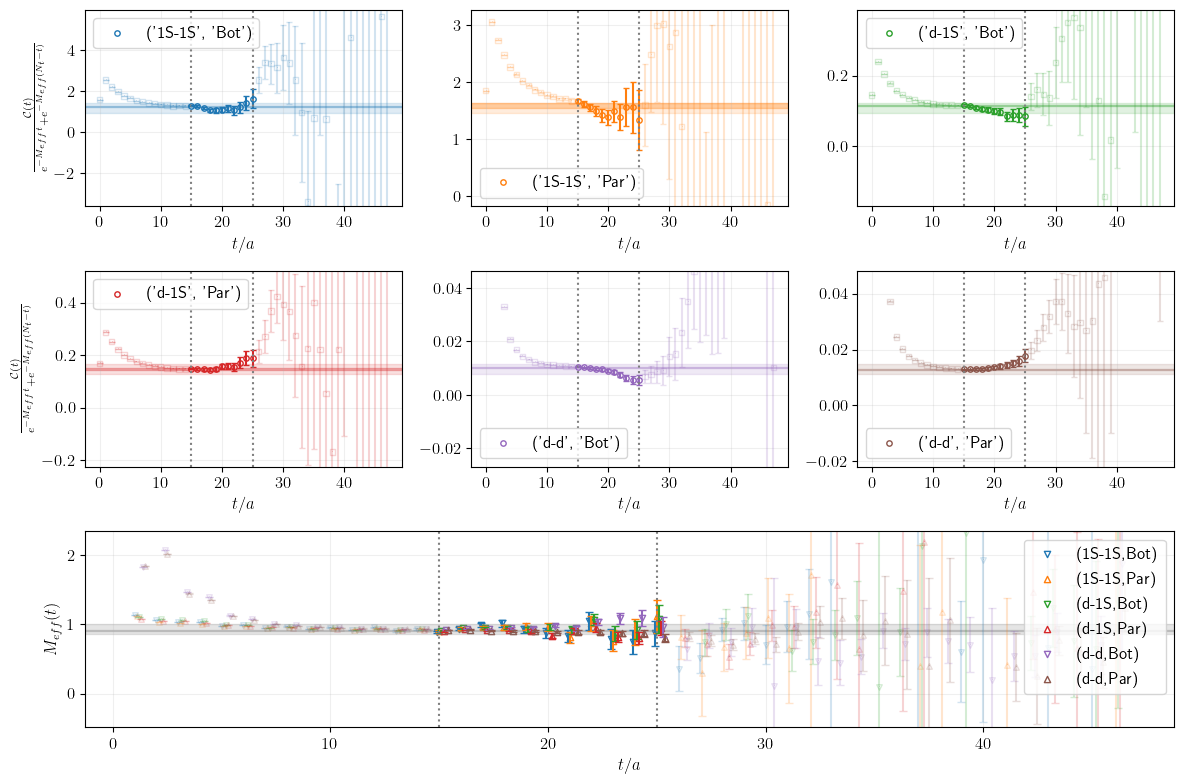

In [127]:
toplot = stag.meff(TRANGE_EFF,**cov_specs,plottable=True)

plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 12

plt.figure(figsize=(12, 6 if len(stag.keys)/len(SMSLIST)==1 else 8))
plot_effective_coeffs(TRANGE_EFF,Aknob=20,*toplot)

plt.tight_layout()
plt.show()

Here we set priors

In [128]:
priors = stag.priors(NSTATES,Meff=effm,Aeff=effa)
# priors = stag.priors(NSTATES,Meff=effm)

# priors['E'][0] = gv.gvar('0.912(70)')

# priors['E'][2] = gv.gvar('-1.2(1.0)')

priors

{'E': [0.912(37), -2.08(58), -1.35(76), -2.6(2.5), -2.6(2.5), -2.6(2.5)],
 'Z_1S_Bot': [0.1(1.7), -1.2(1.2), 0.5(1.5), 0.5(1.5), 0.5(3.0), 0.5(3.0)],
 'Z_1S_Par': [0.2(1.3), -1.2(1.2), 0.5(1.5), 0.5(1.5), 0.5(3.0), 0.5(3.0)],
 'Z_d-1S_Bot': [0.5(1.7), 0.5(1.7), 0.5(1.7), 0.5(1.7)],
 'Z_d-1S_Par': [0.5(1.7), 0.5(1.7), 0.5(1.7), 0.5(1.7)],
 'Z_d_Bot': [-2.29(80), -3.0(1.5), 0.5(1.5), 0.5(1.5), 0.5(3.0), 0.5(3.0)],
 'Z_d_Par': [-2.18(81), -5.5(2.0), 0.5(1.5), 0.5(1.5), 0.5(3.0), 0.5(3.0)]}

In [111]:
priors = {}
priors['E'] =   [gv.gvar('0.8370 (88)'),  
                  gv.gvar(' -2.40 (81)'),  
                  gv.gvar(' -1.35 (56)'),  
                  gv.gvar(' -2.6 (2.5)'),  
                  gv.gvar(' -2.6 (2.5)'),  
                  gv.gvar(' -2.6 (2.5)')]  
priors['Z_1S_Unpol'] = [gv.gvar('0 ± 1.2'),  
                  gv.gvar(' -1.2 (1.2)'),  
                  gv.gvar('  0.5 (1.5)'),  
                  gv.gvar('  0.5 (1.5)'),  
                  gv.gvar('  0.5 (3.0)'),  
                  gv.gvar('  0.5 (3.0)')]  
priors['Z_d_Unpol'] = [gv.gvar('-2.41 (48)'),  
                  gv.gvar(' -3.0 (1.5)'),  
                  gv.gvar('  0.5 (1.5)'),  
                  gv.gvar('  0.5 (1.5)'),  
                  gv.gvar('  0.5 (3.0)'),  
                  gv.gvar('  0.5 (3.0)')]  
priors['Z_d-1S_Unpol'] = [gv.gvar('0.5 (1.7)'),  
                  gv.gvar('  0.5 (1.7)'),  
                  gv.gvar('  0.5 (1.7)'),  
                  gv.gvar('  0.5 (1.7)')]  

Now we perform the fit

In [130]:
fit = stag.fit(
    Nstates = NSTATES,
    trange  = TRANGE,
    priors  = priors,
    verbose = True,
    **cov_specs
)

---------- 3+3 fit in (7, 25) for mes: Dst of ens: Fine-1 for mom: 300 --------------
Least Square Fit:
  chi2/dof [dof] = 1.1 [114]    Q = 0.28    logGBF = 2068.6

Parameters:
            E 0   0.9176 (36)     [ 0.912 (37) ]  
              1    -3.16 (35)     [ -2.08 (58) ]  *
              2    -1.30 (19)     [ -1.35 (76) ]  
              3    -2.22 (23)     [ -2.6 (2.5) ]  
              4    -1.89 (70)     [ -2.6 (2.5) ]  
              5    -1.07 (26)     [ -2.6 (2.5) ]  
     Z_1S_Bot 0   -0.002 (28)     [  0.1 (1.7) ]  
              1    -0.23 (15)     [ -1.2 (1.2) ]  
              2     1.10 (33)     [  0.5 (1.5) ]  
              3     0.62 (25)     [  0.5 (1.5) ]  
              4     0.4 (1.7)     [  0.5 (3.0) ]  
              5     1.63 (52)     [  0.5 (3.0) ]  
     Z_1S_Par 0    0.135 (29)     [  0.2 (1.3) ]  
              1    -0.46 (11)     [ -1.2 (1.2) ]  
              2     1.25 (23)     [  0.5 (1.5) ]  
              3   0.05 (1.43)     [  0.5 (1.5) ]  
      

In [131]:
fitres = stag.fit_result(
    NSTATES,
    TRANGE,
    verbose = True,
    priors  = priors if WPRIORS else None
)

# ---------- 3+3 fit in (7, 25) for mes: Dst of ens: Fine-1 for mom: 300 --------------
Least Square Fit:
  chi2/dof [dof] = 1.1 [114]    Q = 0.28    logGBF = 2068.6

Parameters:
            E 0   0.9176 (36)     [ 0.912 (37) ]  
              1    -3.16 (35)     [ -2.08 (58) ]  *
              2    -1.30 (19)     [ -1.35 (76) ]  
              3    -2.22 (23)     [ -2.6 (2.5) ]  
              4    -1.89 (70)     [ -2.6 (2.5) ]  
              5    -1.07 (26)     [ -2.6 (2.5) ]  
     Z_1S_Bot 0   -0.002 (28)     [  0.1 (1.7) ]  
              1    -0.23 (15)     [ -1.2 (1.2) ]  
              2     1.10 (33)     [  0.5 (1.5) ]  
              3     0.62 (25)     [  0.5 (1.5) ]  
              4     0.4 (1.7)     [  0.5 (3.0) ]  
              5     1.63 (52)     [  0.5 (3.0) ]  
     Z_1S_Par 0    0.135 (29)     [  0.2 (1.3) ]  
              1    -0.46 (11)     [ -1.2 (1.2) ]  
              2     1.25 (23)     [  0.5 (1.5) ]  
              3   0.05 (1.43)     [  0.5 (1.5) ]  
    

In [101]:
try:
    print(f'{np.exp(fit.p["Z_1S_Par"][0]) = }')
    print(f'{np.exp(fit.p["Z_1S_Bot"][0]) = }')
    print(f'{np.exp(fit.p["Z_d_Par"] [0]) = }')
    print(f'{np.exp(fit.p["Z_d_Bot"] [0]) = }')
except KeyError:
    print(f'{np.exp(fit.p["Z_1S_Unpol"][0]) = }')
    print(f'{np.exp(fit.p["Z_d_Unpol"] [0]) = }')

np.exp(fit.p["Z_1S_Unpol"][0]) = 1.560(12)
np.exp(fit.p["Z_d_Unpol"] [0]) = 0.0959(10)


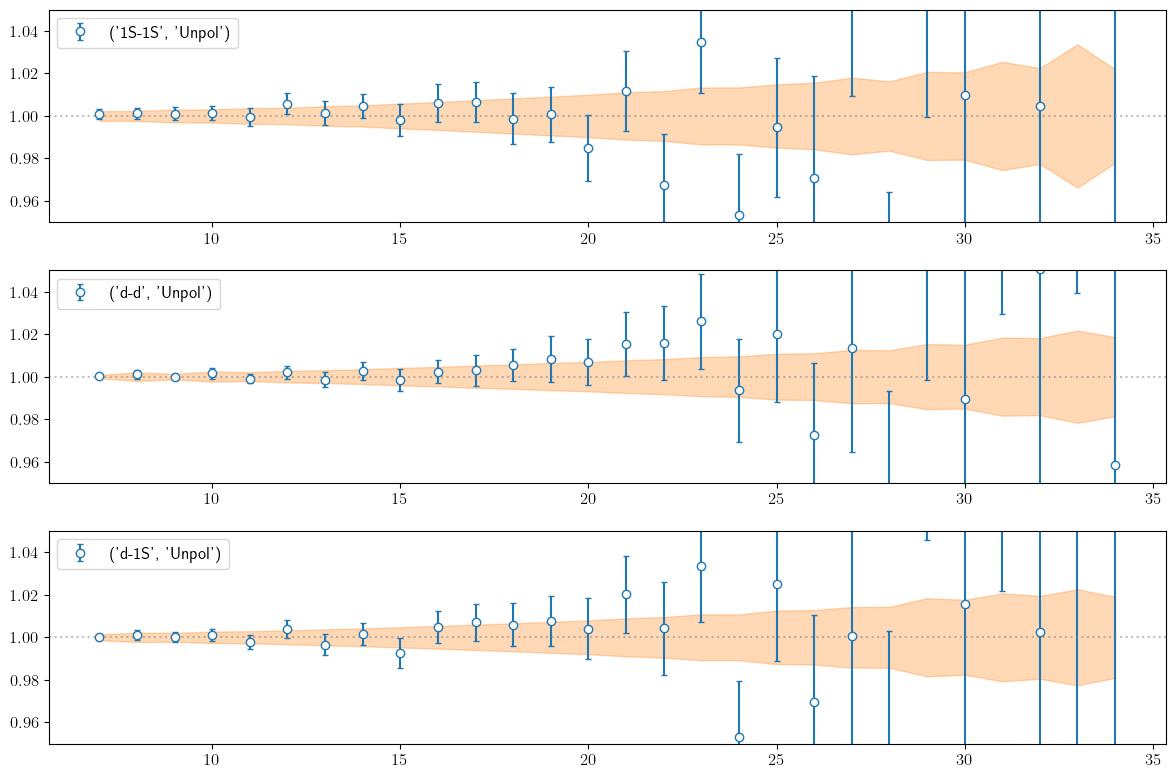

In [102]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 12

npol = len(stag.keys)//len(SMSLIST)
f, ax = plt.subplots(3,npol,figsize=(12,8))
stag.plot_fit(ax,NSTATES,TRANGE)

plt.tight_layout()

In [103]:
from b2heavy.TwoPointFunctions.utils import p_value

def standard_p(io,fit):
    chi2red = fit.chi2
    for k,pr in fit.prior.items():
        for i,p in enumerate(pr):
            chi2red -= ((fit.pmean[k][i]-p.mean)/p.sdev)**2
    
    ndof  = len(fit.y) - sum([len(pr) for k,pr in fit.prior.items()]) 

    aux = StagFitter(io=io,jkBin=0)
    nconf = aux.data.shape[-2]

    return p_value(chi2red,nconf,ndof)


standard_p(io,fit)

0.08917217824814316

In [104]:
from b2heavy.TwoPointFunctions.utils import p_value

chi2  = float(fitres['chi2'])
aux = StagFitter(
    io       = io,
    jkBin    = 0,
    smearing = SMSLIST
)
nconf = aux.data.shape[-2]
ndof  = len(fit.y) - sum([len(priors[k]) for k in priors]) 

p_value(chi2,nconf,ndof)

0.052093642472651865